<a href="https://colab.research.google.com/github/saur112/sentiment-Analysis-of-cryptocurrency/blob/main/project_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import emoji
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# plt.style.use('fivethirtyeight')

In [ ]:
!pip install emoji


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

In [ ]:
log=pd.read_csv('Login.csv')
print(log)

In [ ]:
api_key="yy3kyWgnsLU59dPKfOQ2aRvbX"
api_key_secret="HHJXye1yLWhgUqiIiqVSEC4RGYUXwjc71OvHZIgK4VrFouYiVS"

access_token="1551961597903785984-ipWmG5mCpSj7FUH3oNEmVz7vPMJExi"
access_token_secret="XSTYlQu0t6FrmQALAgEqCffFrBXLURND4ldXGWNuOGFNa"

In [ ]:
#fetching api
authentication=tweepy.OAuthHandler(api_key,api_key_secret)
authentication.set_access_token(access_token,access_token_secret)

api=tweepy.API(authentication,wait_on_rate_limit=True)
print(api)

In [ ]:
# search='#Ethereum-filter:retweets'
# search='#viratkohli-filter:retweets'
# search='#Yuzi Chahal-filter:retweets'
search='#bitcoin-filter:retweets'

t=tweepy.Cursor(api.search,q=search,lang='en',since='2022-04-05',tweet_mode='extended').items(500)
l=[i.full_text for i in t]


In [ ]:
df=pd.DataFrame(l,columns=['Tweets'])#data extraction
df.head(10)

,Tweets
0,Russian Prime Minister Orders Finance Ministry...
1,👀Looking for a #crypto job?\nReply with your s...
2,"Crypto Market Hasn't Bottomed Yet, Analyst Say..."
3,"15 September\n📊Market Stats\n🔹#BTC: $20,154.07..."
4,Current #Cardano price Alert: \n\n#ADA $0.47 U...
5,❤️2 DANCE U WILL ❤️ https://t.co/L7ejSIAK1b SH...
6,#Ethereum price update: \n\n#ETH $1579.36 USD\...
7,NEW: A Chinese court approves trading of crypt...
8,In this week's @monineversleeps newsletter:\n»...
9,Working hard on some advanced support and resi...


In [ ]:
#cleaning the tweets
def clean_tweet(a):
  a=re.sub('#bitcoin','bitcoin',a)
  a=re.sub('#Bitcoin','Bitcoin',a)
  a=re.sub('#Ethereum','Ethereum',a)
  a=emoji.demojize(a)
  a=a.replace(":","")
  a = BeautifulSoup(a).get_text()
  a=re.sub('(#[A-Za-z0-9]+|@[A-Za-z0-9])',"",a)
  a=' '.join(re.sub("[\.\,\!\?\:\;\-\=]", " ", a).split())
  a=re.sub('\\n','',a)
  a=re.sub('\w+:\/\/\S+','',a)
  # a = ' '.join(re.sub("(\w+:\/\/\S+)", " ", a).split())
  return a 
df['fresh_tweet']=df['Tweets'].apply(clean_tweet)
df.head(10)

,Tweets,fresh_tweet
0,Russian Prime Minister Orders Finance Ministry...,Russian Prime Minister Orders Finance Ministry...
1,👀Looking for a #crypto job?\nReply with your s...,eyesLooking for a job Reply with your skills a...
2,"Crypto Market Hasn't Bottomed Yet, Analyst Say...",Crypto Market Hasn't Bottomed Yet Analyst Says...
3,"15 September\n📊Market Stats\n🔹#BTC: $20,154.07...",15 September bar_chartMarket Stats small_blue_...
4,Current #Cardano price Alert: \n\n#ADA $0.47 U...,Current price Alert $0 47 USD Bitcoin 2 337962...
5,❤️2 DANCE U WILL ❤️ https://t.co/L7ejSIAK1b SH...,red_heart2 DANCE U WILL red_heart https//t co/...
6,#Ethereum price update: \n\n#ETH $1579.36 USD\...,Ethereum price update $1579 36 USD Bitcoin 0 0...
7,NEW: A Chinese court approves trading of crypt...,NEW A Chinese court approves trading of crypto...
8,In this week's @monineversleeps newsletter:\n»...,In this week's onineversleeps newsletter » ‘St...
9,Working hard on some advanced support and resi...,Working hard on some advanced support and resi...


In [ ]:
def getSubjectivity(b):
  return TextBlob(b).sentiment.subjectivity

def getpolarity(b):
  return TextBlob(b).sentiment.polarity

df['subjectivity']=df['fresh_tweet'].apply(getSubjectivity)
df['polarity']=df['fresh_tweet'].apply(getpolarity)
df.head(50)

,Tweets,fresh_tweet,subjectivity,polarity
0,Russian Prime Minister Orders Finance Ministry...,Russian Prime Minister Orders Finance Ministry...,0.125000,0.000000
1,👀Looking for a #crypto job?\nReply with your s...,eyesLooking for a job Reply with your skills a...,0.000000,0.000000
2,"Crypto Market Hasn't Bottomed Yet, Analyst Say...",Crypto Market Hasn't Bottomed Yet Analyst Says...,0.000000,0.000000
3,"15 September\n📊Market Stats\n🔹#BTC: $20,154.07...",15 September bar_chartMarket Stats small_blue_...,0.000000,0.000000
4,Current #Cardano price Alert: \n\n#ADA $0.47 U...,Current price Alert $0 47 USD Bitcoin 2 337962...,0.325000,0.000000
5,❤️2 DANCE U WILL ❤️ https://t.co/L7ejSIAK1b SH...,red_heart2 DANCE U WILL red_heart https//t co/...,0.000000,0.000000
6,#Ethereum price update: \n\n#ETH $1579.36 USD\...,Ethereum price update $1579 36 USD Bitcoin 0 0...,0.250000,0.000000
7,NEW: A Chinese court approves trading of crypt...,NEW A Chinese court approves trading of crypto...,0.227273,0.068182
8,In this week's @monineversleeps newsletter:\n»...,In this week's onineversleeps newsletter » ‘St...,0.100000,0.100000
9,Working hard on some advanced support and resi...,Working hard on some advanced support and resi...,0.532071,0.081566


In [ ]:
# function to get sentiment of tweets
def getSentiment(tweet):
  if tweet<0:
    return "Negative"
  elif tweet==0:
    return "Neutral"
  else:
    return "Positive"

In [ ]:
# Now we are storing the sentiments
df['Sentiment']=df['polarity'].apply(getSentiment)
df.head(20)

,Tweets,fresh_tweet,subjectivity,polarity,Sentiment
0,Russian Prime Minister Orders Finance Ministry...,Russian Prime Minister Orders Finance Ministry...,0.125000,0.000000,Neutral
1,👀Looking for a #crypto job?\nReply with your s...,eyesLooking for a job Reply with your skills a...,0.000000,0.000000,Neutral
2,"Crypto Market Hasn't Bottomed Yet, Analyst Say...",Crypto Market Hasn't Bottomed Yet Analyst Says...,0.000000,0.000000,Neutral
3,"15 September\n📊Market Stats\n🔹#BTC: $20,154.07...",15 September bar_chartMarket Stats small_blue_...,0.000000,0.000000,Neutral
4,Current #Cardano price Alert: \n\n#ADA $0.47 U...,Current price Alert $0 47 USD Bitcoin 2 337962...,0.325000,0.000000,Neutral
5,❤️2 DANCE U WILL ❤️ https://t.co/L7ejSIAK1b SH...,red_heart2 DANCE U WILL red_heart https//t co/...,0.000000,0.000000,Neutral
6,#Ethereum price update: \n\n#ETH $1579.36 USD\...,Ethereum price update $1579 36 USD Bitcoin 0 0...,0.250000,0.000000,Neutral
7,NEW: A Chinese court approves trading of crypt...,NEW A Chinese court approves trading of crypto...,0.227273,0.068182,Positive
8,In this week's @monineversleeps newsletter:\n»...,In this week's onineversleeps newsletter » ‘St...,0.100000,0.100000,Positive
9,Working hard on some advanced support and resi...,Working hard on some advanced support and resi...,0.532071,0.081566,Positive


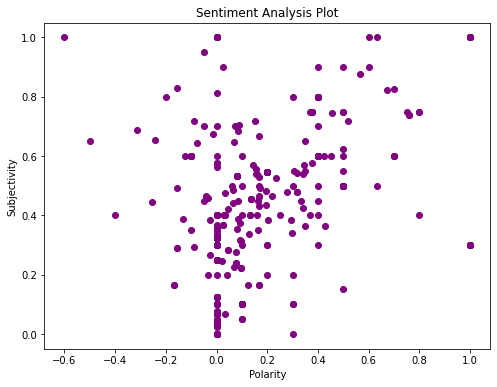

In [ ]:
# plotting to show the subjectivity and polarity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['polarity'][i],df['subjectivity'][i],color='Purple')
plt.title('Sentiment Analysis Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [ ]:
df.shape[0]

500

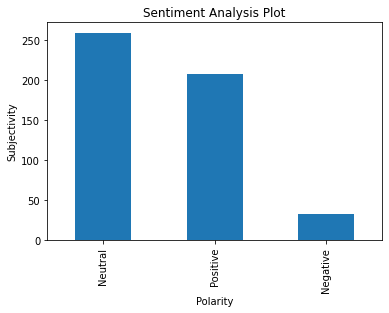

In [ ]:
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

Neutral     259
Positive    208
Negative     33
Name: Sentiment, dtype: int64


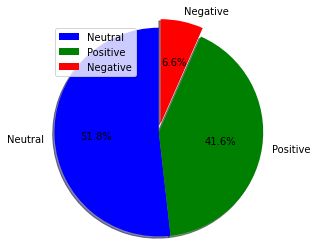

In [ ]:
# bar chart for analysis
a=df['Sentiment'].value_counts()
print(a)
l=[]
for i in a:
  l.append(i)
activities = ["Neutral","Positive","Negative"]
  
colors = ['b', 'g', 'r']
  
# plotting the pie chart
plt.pie(l, labels = activities, colors=colors, 
        startangle=90, shadow = True, explode = (0, 0, 0.1),
        radius = 1.2, autopct = '%1.1f%%')

plt.legend()
plt.show()